# 1. Introduction to Reinforcement Learning

In [1]:
from utils.grader import make_tester
from notebooks.internal.exercises_1_intro_to_rl import square_cases

## Background — Sequential Combinatorial Problems

### Sequential Decision Problems
Solving sequential decision problems are problems where actions must be taken successively. This in contrast to many other Machine Learning domains where only a single decision is needed: for example classification (e.g. predicting whether an image belongs to a certain class, like whether it is a cat picture) or regression tasks (e.g. predicting the valuation of a house).

### Combinatorial Problems
Specifically, we are focused on a specific type of sequential decision problems known as **combinatorial problems**. Combinatorial problems are questions about how discrete things can be arranged, selected, combined, or optimized. By *discrete*, we simply mean objects that are distinct and countable. Combinatorial problems suffer from exponential blow-up or **combinatorial explosion**, because choices *multiply* rapidly, quickly intensifying the amount of compute power needed. Here is an example of a combinatorial problem:

> Imagine a pizzeria that offers 8 distinct toppings (say: pepperoni, mushrooms, onions, olives, bell peppers, chicken, spinach, and pineapple). Each customer can choose any **subset** of these toppings — including the possibility of "no toppings" or "all toppings."

How many distinct types of pizzas can be made? In this case, it would be a staggering $2^8 = 256$ (which, as a bit of interesting background knowledge, more formally corresponds to something called the "power set"). 

While this was just a fun example, in many other application domains, considering all combinations becomes important. Consider the following scenario:
> Every day an airline must assign thousands of pilots and flight attendants to thousands of flight legs. Each crew member has legal limits on duty hours, mandatory rest, base cities, training qualifications (e.g., aircraft type), and seniority‑based bidding preferences.

<p align="center">
  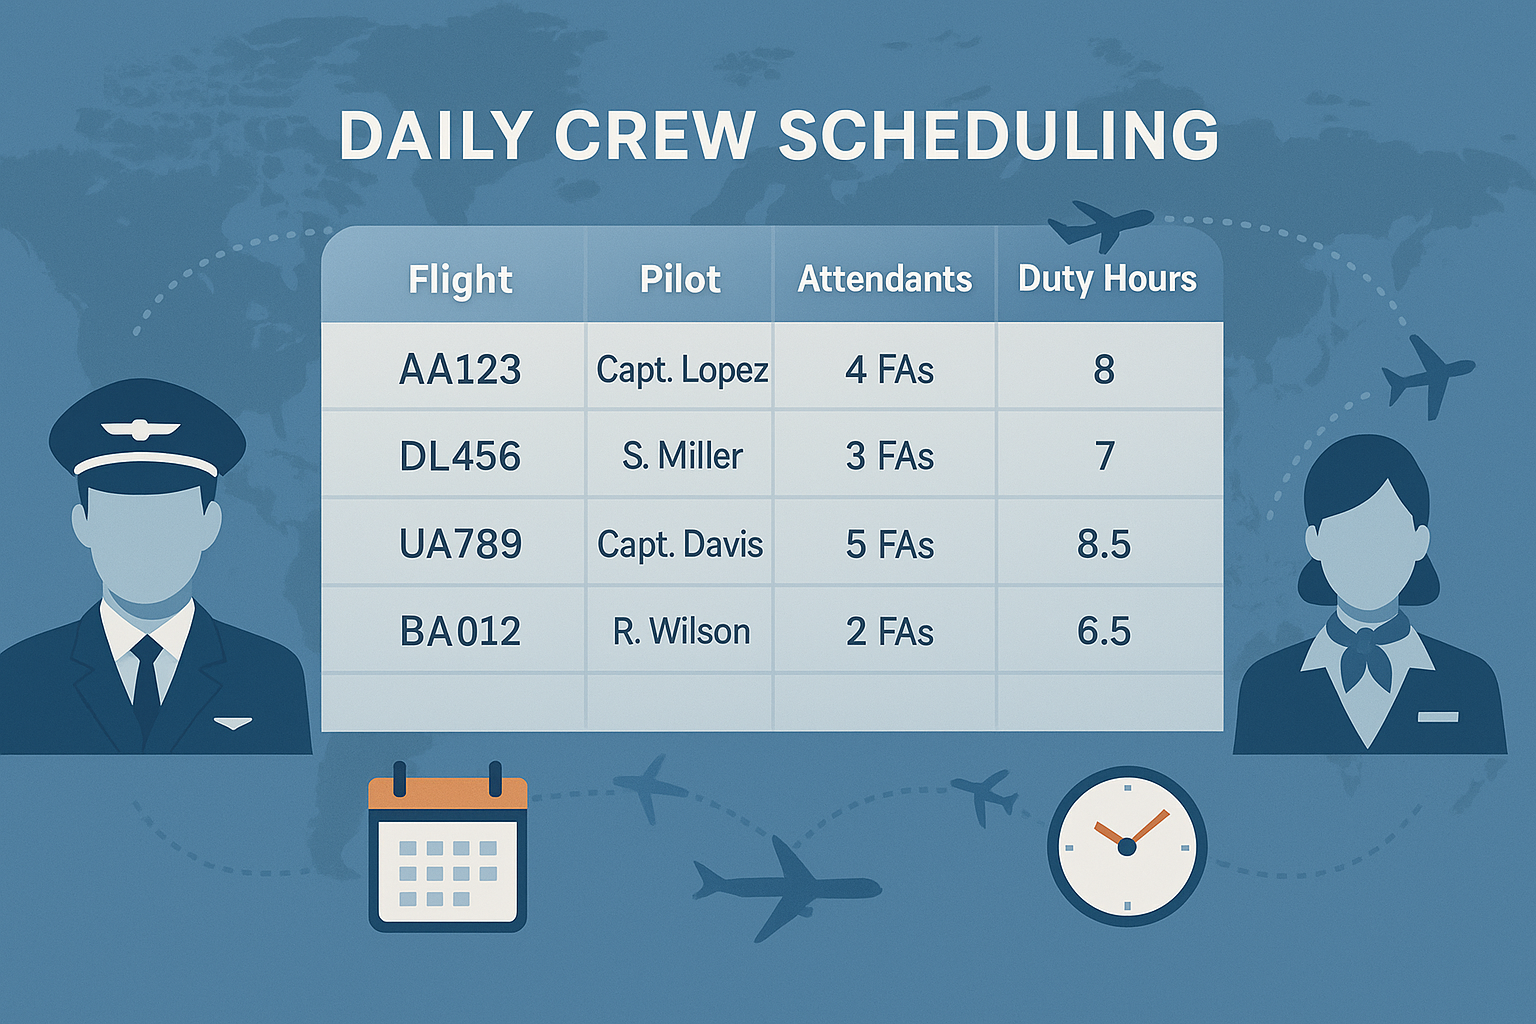
</p>

When you multiply those constraints across an entire weekly timetable, the number of feasible crew pairings skyrockets—well beyond what could ever be enumerated explicitly — so airlines rely on combinatorial optimization techniques (e.g. column generation, branch‑and‑price, heuristics) to find near‑optimal schedules. Note that *near optimal* is sufficient in many domains, always striving for optimality can require a much more exhaustive search.

#### Realistic Domains
Combinatorial optimization problems are frequently characterized by being intractable for classical algorithms or prone to suboptimal solutions. However, combinatorial problems naturally arise in logistics (e.g., vehicle routing), scheduling (e.g., job shop), network design (e.g., flow), finance (e.g., portfolio selection), and beyond. Even minor improvements in these domains can yield substantial benefits in cost, efficiency, or strategy. However, designing heuristics and metaheuristics to tackle their complexity is time-consuming.

## Heuristics
When solving combinatorial problems, there is often a reliance on heuristics (as well as something called "metaheuristics" which we can ignore for now). A **heuristic** is a rule‑of‑thumb (algorithm or decision policy) that helps speed up the search algorithm for a solution. Under the right conditions, a heuristic can still deliver an optimal solution, however this does not necessarily have to be the case. For the airline example, we can try a heuristic algorithm along the following lines:
> For every crew, keep a running “cursor” that points to the last flight they can still catch given legal connection times. Assign the earliest uncovered flight to the crew whose cursor makes it feasible and whose home base matches (ties broken by least additional duty time).
This is a decent heuristic, but not completely optimal for a few reasons, including teh fact that it might leave some larger gaps which increase hotel costs, and also does not consider seniority bidding preferences (which may have to be considered as a second processing step involving swapping flights where possible).

The underlying idea of heuristics is we want to avoid exhaustively searching the entire search space (involving all potential combinations) for the optimal solution. Rather, we want to explore a promising part of the search space. This promising part may contain the optimal solution, although, it may simply include a near-optimal solution.

## Why should we use Reinforcement Learning?
Crafting reliable heuristics and metaheuristics is a very intensive task that requires a lot of domain expertise.

On the other hand, **Reinforcement Learning** has excelled at sequential decision-making tasks in fields ranging from autonomous driving and industrial control to robotics, protein folding, theorem proving, and multiagent games such as Chess and Go, where it has achieved superhuman performance.

Reinforcement Learning learns from experience, explicitly considering the trade-off between **exploring** (seeking out new knowledge or areas of the search space) and **exploiting** (doing what it knows to be the most optimal selection at a given time point).

Therefore, implicitly, Reinforcement Learning can be stated to automatically learn heuristics and domain properties, without requiring any hand-coded knowledge. 

## What is Reinforcement Learning exactly? (A high-level overview)

<p align="center">
  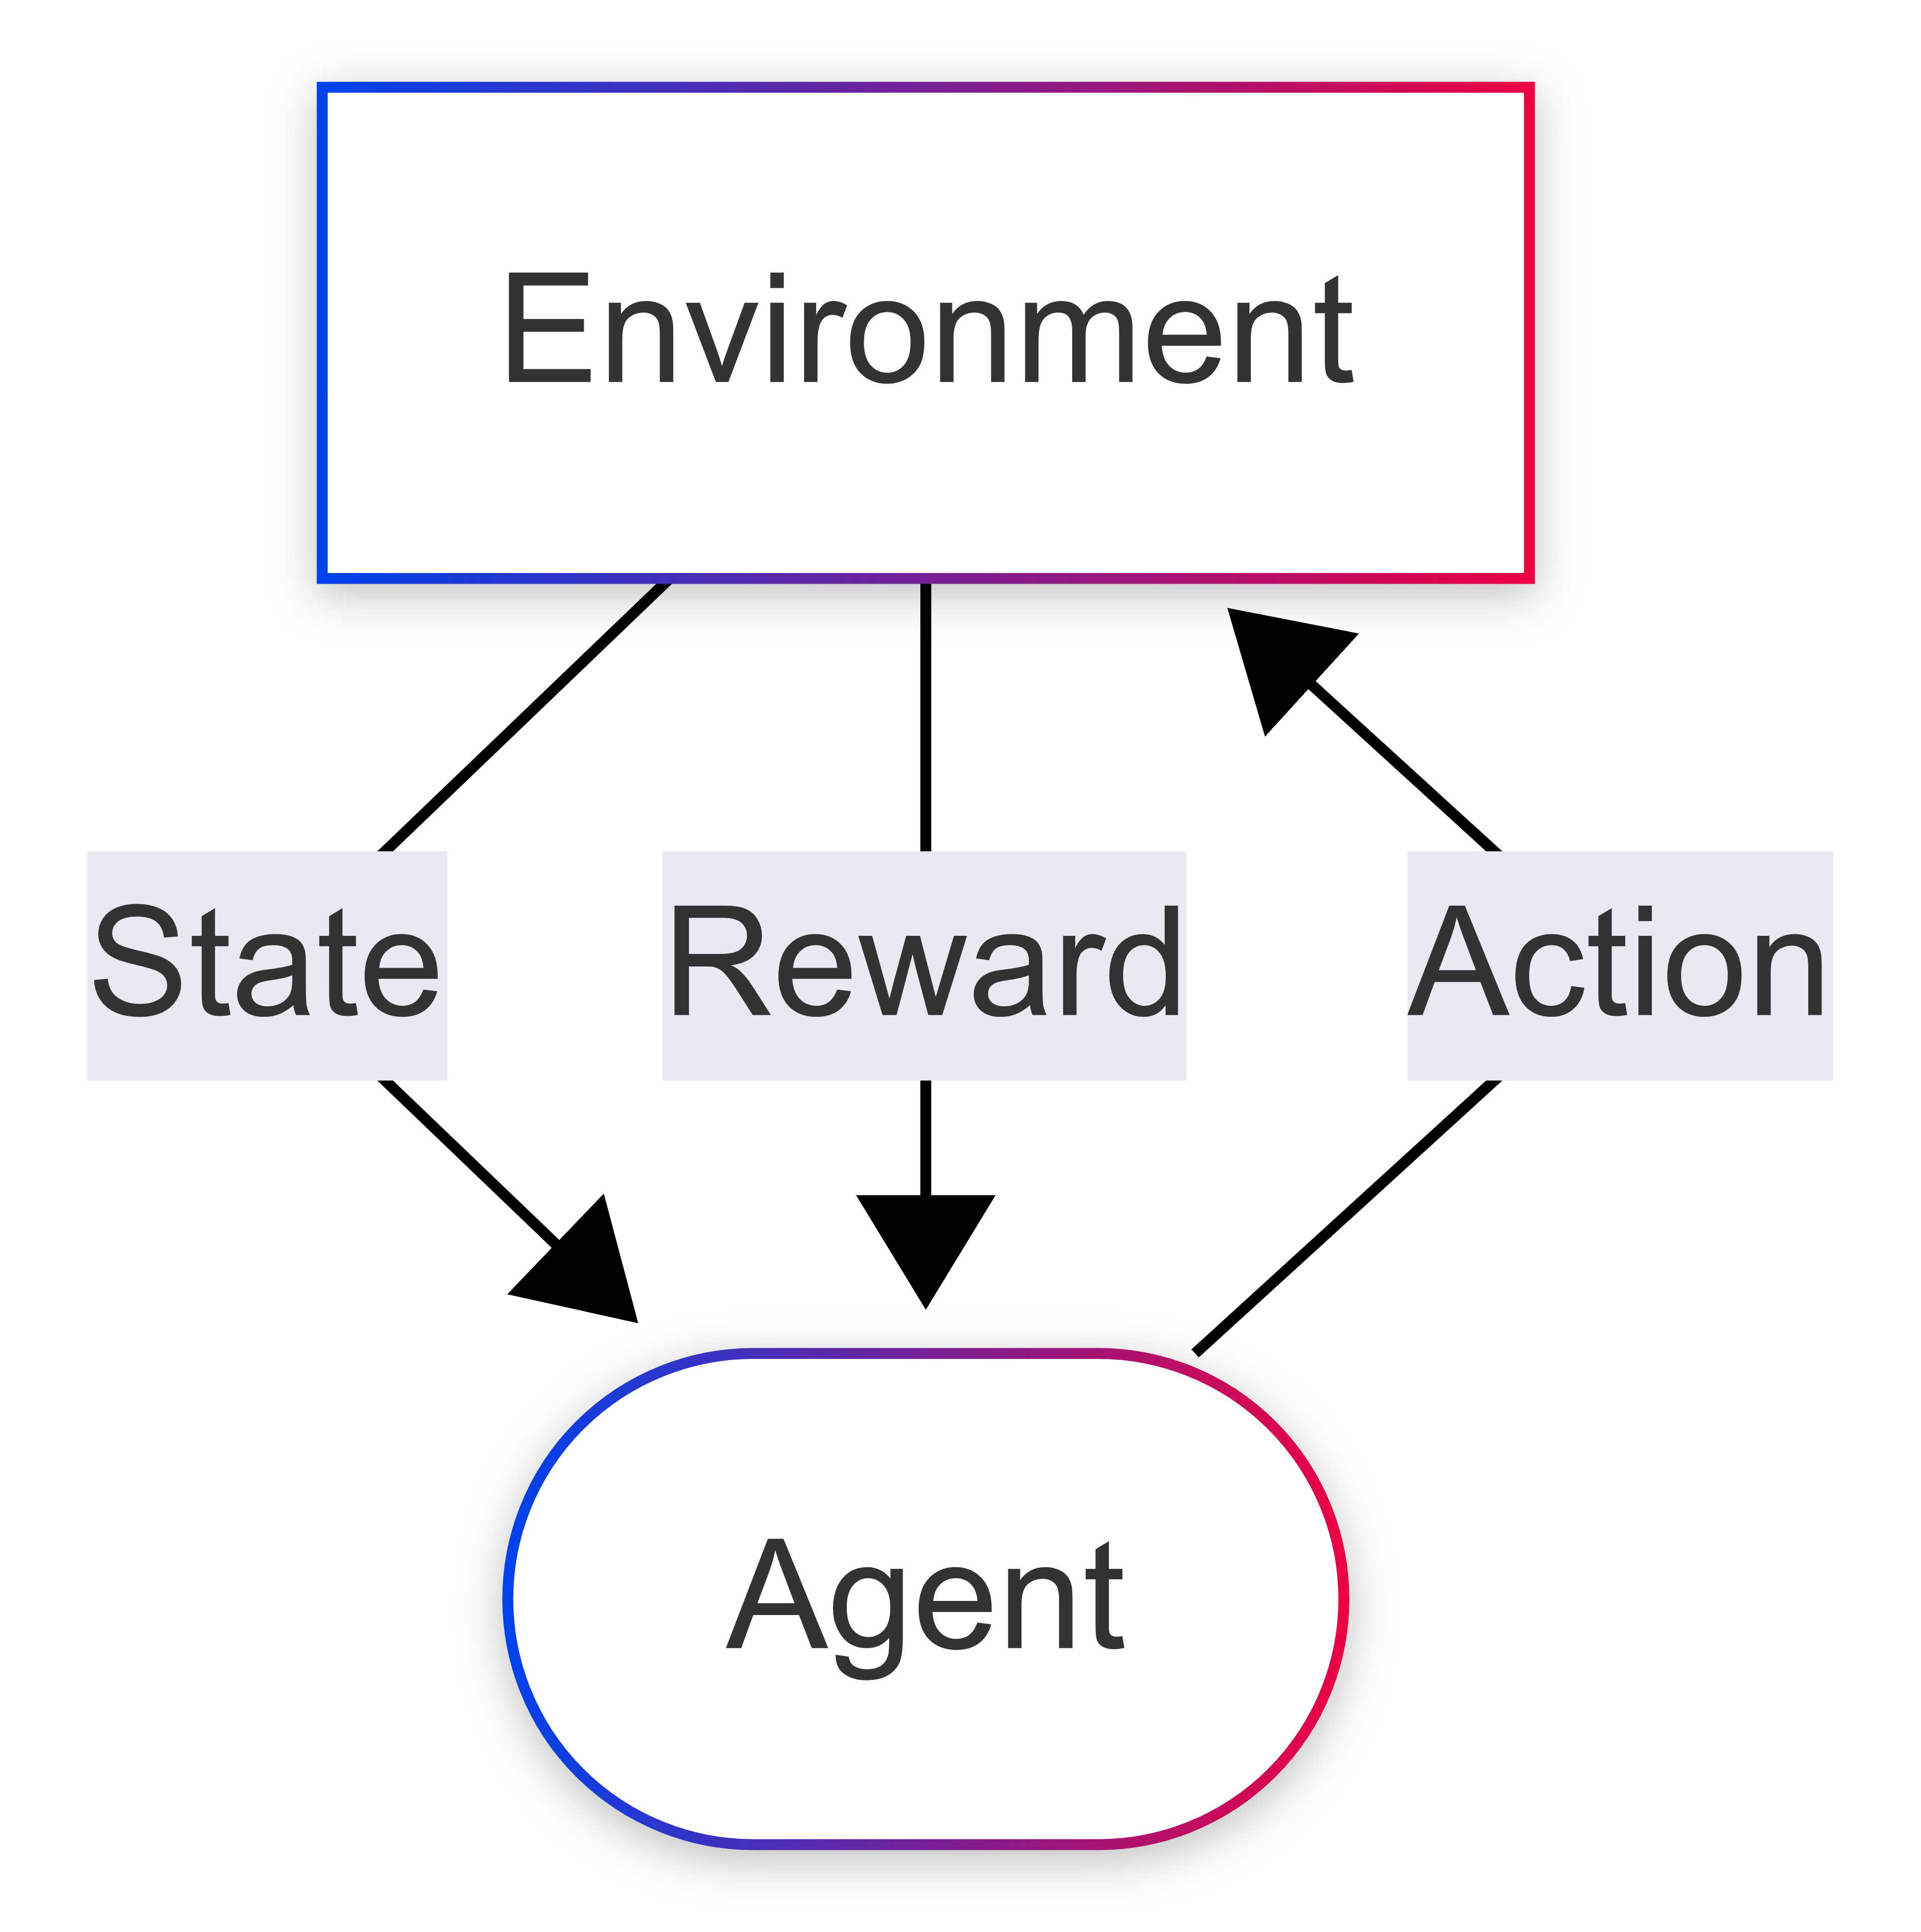
</p>


Reinforcement Learning is a sampling-based approach that learns in an *online* fashion, by actively taking actions in an environment, learning from experience. An agent (which in reality is any Reinforcement Learning algorithm) is said to be exploring and acting in the environment.

Specifically, Reinforcement Learning involves the key following ingredients:
* **states**: also referred to as the *observation/state space*. It tells you what state the system is in, for example in the airline scenario, it would tell you where all the crew are currently located at, what their status is, and what the status of any unassigned/assigned flights are in. We start with an initial state of the state space, commonly referred to as $s_0$.
* **actions**: an agent can take a single action from the *action space* at each time step. Upon taking an action, such as assigning a flight crew to a particular flight, the environment advances one step, into a new resultant state, where the agent can take a subsequent action.
* **reward**: a reward is received upon taking an action in a state, that tells how useful the action was. In some environments, the reward can only be provided at the end of the task, this is termed as *sparse reward*. Learning is more efficient when the agent is provided a more dense reward, at each time step (following each action), but this is not ultimately required.

The state space, action space, and reward function, is provided by a given **environment**. Any combinatorial problem space you can think of can be represented as a reinforcement learning environment. At each time step, the agent starts in a particular state, takes a desired action, and ends up in a new state for the next time step where this process repeats until a final time step.

**Crucial idea)** By taking actions, the agent receives a reward, and can learn how effective their action trajectory was. Reinforcement Learning **learns from experience**, taking a combination of random (exploring) actions and optimal actions. Unlike classical Machine Learning, you do not need to provide any data set, only an environment that the agent can act and explore in.

We will be considering **episodic RL**, that is a form of Reinforcement Learning with a finite number of time steps that is then terminated and restarts a new episode. This helps because the agent will also be reset into an initial state often enough to explore different strategies effectively.

Specifically, the agent is trying to learn an **optimal policy** ($\pi$), a policy simply tells the agent which action $a$ (from the action space) to take in any given state $s$ (from the entire state space). An optimal policy would be produce the highest amount of possible cumulative reward (cumulatively collated from each time step of the environment).

## Course Structure
You have now almost completed notebook 1, well done! Following this, notebook 2 will cover the implementation of a foundational, and quite intuitive algorithm of Tabular Q Learning. Notebook 3 will teach you how to perform hyperparameter tuning (setting the best parameters for your RL algorithm to learn in) and visualise the training results, where you will be supplied with the Monty Hall environment. Finally, Notebook 4 will conclude with teaching you on how exactly you can define your own environment using Gymnasium, allowing you to apply RL to any problem space you can think of.

## Solving Exercises in Notebooks
> **Note:** for the complete exemplar experience, you should work directly within the notebooks instead of viewing the exemplar through the website as interactive elements (e.g. exercises) are not functional on the website.

These notebooks are defined with exercises in mind, involving little Python functions or potentially little bits of functions for you to complete. You will then receive some instant feedback using the "run tests" button on whether or not your implementation was correct.

While reference code is provided in the repository, if you are able to, it is best to solve as many exercises without looking at any reference code or solutions. This will strengthen your understanding of how everything works by applying the knowledge you have gained.

For example, try complete the following function, which requires you to simply write a simple mathematical squaring function, multiplying a number by itself and returning the result.

In [2]:
# Implement and complete this!
def square(x):
    return x

In [3]:
tester_widget = make_tester(square, square_cases)
display(tester_widget)

## Glossary
---
This glossary provides a quick reference of some of key concepts introduced within this notebook, which you may find helpful to refer to.

* **action**: an agent can take a single action from the *action space* at each time step. Upon taking an action, the environment advances one step, into a new resultant state capturing the effects of the last action, where the agent can now take a subsequent action.
* **episode**: in *episodic RL*, the agent can take a finite number of actions based on the number of time steps defined per episode, before the agent is reset to a new episode with a new initial state, taking its previous learning experiences with it into the new episode.
* **environment**: an agent can only learn with a given **state** space, **action** space, and **reward** function, and these are supplied by a defined environment.
* **hyperparameter**: a setting you choose before training that shapes how learning happens (e.g., learning rate, discount factor, exploration rate, network size). Hyperparameters aren’t learned by the agent; you pick and tune them to balance speed, stability, and final performance.
* **initial state**: the agent starts in some initial state $s_0$ from the *state-space* of the *environment*. The initial state is a default configuration where no actions have been taken yet. 
* **reward**: a reward is received upon taking an action in a state, that tells how useful the action was. In some environments, the reward can only be provided at the end of the task, this is termed as *sparse reward*. Learning is more efficient when the agent is provided a more dense reward, at each time step (following each action), but this is not ultimately required. The reward is governed by the **reward function** defined per environment.
* **policy**: governs which action $a$ from the action space that the agent will take in any given state $s$ from the state/observation space. An **optimal policy** is one which always takes the most optimal action (which produces the highest rewards) from any given state.
* **state**: also called the *observation space*. It tells you what state the system is in, capturing all active facts of the environment. We start with an initial state of the state space, commonly referred to as $s_0$.
* **time step**: a single time step advances after taking a single (atomic) action. Also see **episode** or **episodic RL**.
* **tabular Q-learning**: a simple, classic RL method that keeps a table of values (Q-values) for each state–action pair in a table. As the agent interacts, it updates the table based on observed rewards and then chooses actions with the highest values, gradually improving its behaviour without needing a model of the environment.